# Bio-indicators of climate

## Extraction of the 5 species

First of all, we identify the 5 id_pasa.

In [7]:
from stations import *
from species import *
from visualization import *

In [8]:
pasa_var_clim = pd.read_csv('pasa_var_clim_distinct_examples.csv', sep=",", on_bad_lines='skip')
id_pasas = np.unique(pasa_var_clim['id_pasa'])
print(id_pasas)

[   1 2324 4729 4882 7330]


In [9]:
locator = pd.read_csv('pasa_var_clim_distinct_examples.csv', sep=",", on_bad_lines='skip')

fir = Species(locator, id_pasa=7330, name_id_clim='id_clim')
print(fir)
oak = Species(locator, id_pasa=2324, name_id_clim='id_clim')
print(oak)
acanthus = Species(locator, id_pasa=1, name_id_clim='id_clim')
print(acanthus)
dwarf_willow = Species(locator, id_pasa=4729, name_id_clim='id_clim')
print(dwarf_willow)
velvet_bell = Species(locator, id_pasa=4882, name_id_clim='id_clim')
print(velvet_bell)

| Name: ABIES ALBA MILL.    
| ID (pasa): 7330
| ID (cfvvf): 9027
| Number of samples: 3074
| Name: QUERCUS ILEX L.     
| ID (pasa): 2324
| ID (cfvvf): 2847
| Number of samples: 2568
| Name: ACANTHUS MOLLIS L.  
| ID (pasa): 1
| ID (cfvvf): 3
| Number of samples: 18
| Name: SALIX HERBACEA L.   
| ID (pasa): 4729
| ID (cfvvf): 5694
| Number of samples: 201
| Name: BARTSCHIA ALPINA L. 
| ID (pasa): 4882
| ID (cfvvf): 5872
| Number of samples: 242


ACANTHUS MOLLIS = bear's breech, acanthe molle

QUERCUS ILEX = holm oak, chêne vert

SALIX HERBACEA = dwarf willow, saule herbacé

BARTSCHIA ALPINA = velvet bell, bartsie des Alpes

ABIES ALBA = silver fir, sapin blanc

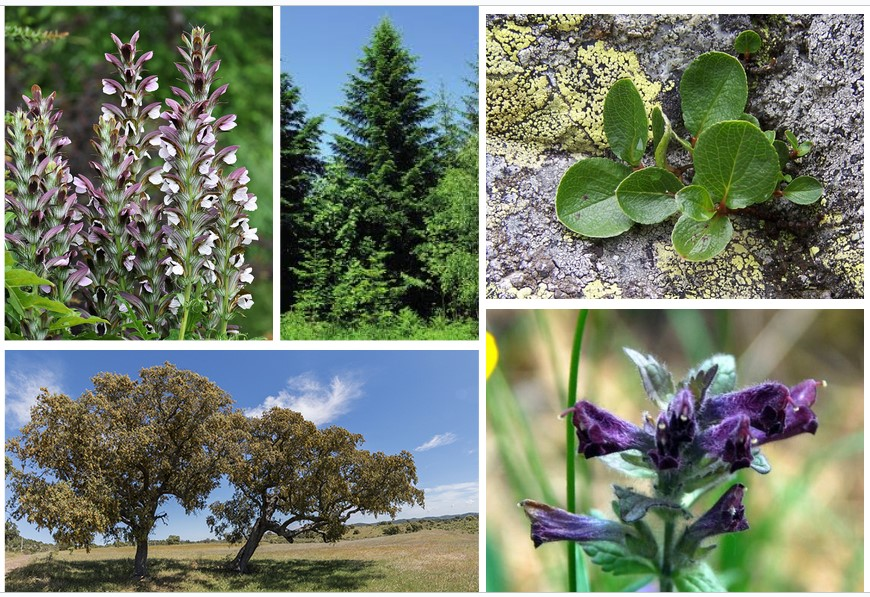

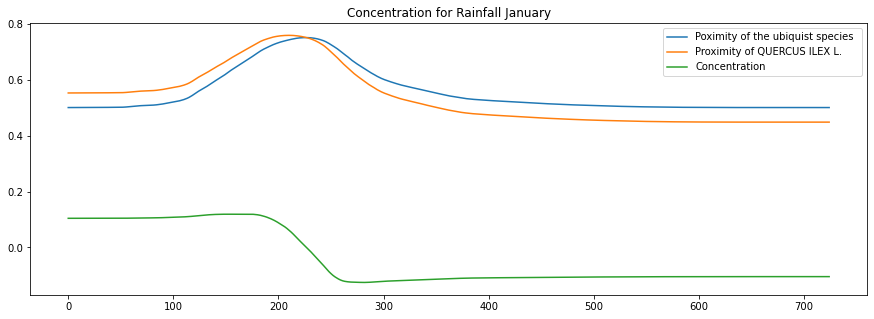

In [10]:
Visualization.plot_concentration(oak, 'rr01_61_90')

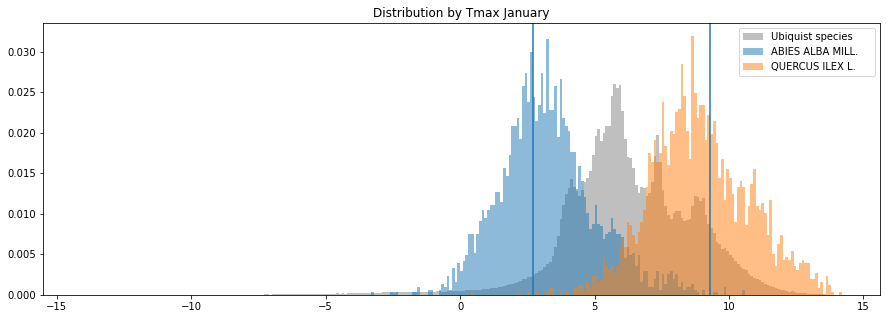

In [11]:
Visualization.plot_hist([fir, oak], 'tx01_61_90')

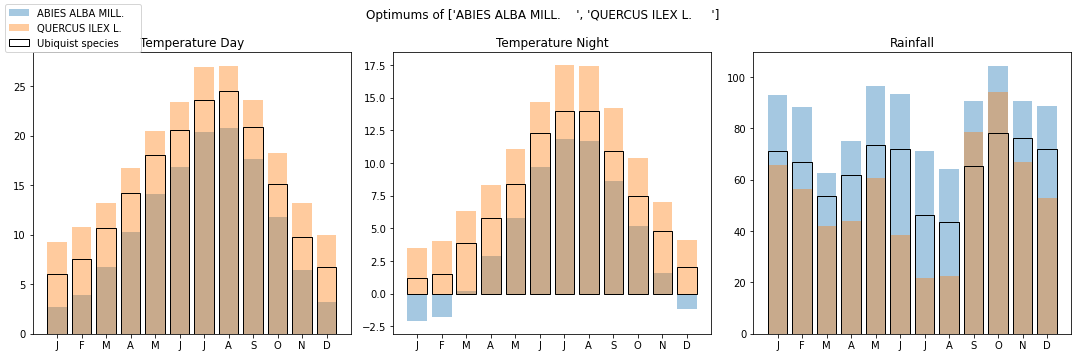

In [12]:
Visualization.plot_summary([fir, oak])

## GLM

In [ ]:
test_species = fir
model = My_GLM()

In [15]:
test_species = fir

In [13]:
grid = pd.read_csv('../Grid/final.csv', sep=",")

In [16]:
grid_columns = ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12',
           'Tmax_01_cu', 'Tmax_02_cu', 'Tmax_03_cu', 'Tmax_04_cu', 'Tmax_05_cu', 'Tmax_06_cu',
           'Tmax_07_cu', 'Tmax_08_cu', 'Tmax_09_cu', 'Tmax_10_cu', 'Tmax_11_cu', 'Tmax_12_cu',
           'Tmin_01_cu', 'Tmin_02_cu', 'Tmin_03_cu', 'Tmin_04_cu', 'Tmin_05_cu', 'Tmin_06_cu',
           'Tmin_07_cu', 'Tmin_08_cu', 'Tmin_09_cu', 'Tmin_10_cu', 'Tmin_11_cu', 'Tmin_12_cu']
columns = ['rr01_61_90', 'rr02_61_90', 'rr03_61_90', 'rr04_61_90', 'rr05_61_90', 'rr06_61_90',
           'rr07_61_90', 'rr08_61_90', 'rr09_61_90', 'rr10_61_90', 'rr11_61_90', 'rr12_61_90',
           'tx01_61_90', 'tx02_61_90', 'tx03_61_90', 'tx04_61_90', 'tx05_61_90', 'tx06_61_90',
           'tx07_61_90', 'tx08_61_90', 'tx09_61_90', 'tx10_61_90', 'tx11_61_90', 'tx12_61_90',
           'tn01_61_90', 'tn02_61_90', 'tn03_61_90', 'tn04_61_90', 'tn05_61_90', 'tn06_61_90', 
           'tn07_61_90', 'tn08_61_90', 'tn09_61_90', 'tn10_61_90', 'tn11_61_90', 'tn12_61_90']
res = np.zeros(len(grid))
for grid_column, column in zip(grid_columns, columns) :
    bin_edges =  test_species.variables[column].bin_edges
    prox = test_species.variables[column].proximities
    indices = np.digitize(grid[grid_column].values, bin_edges)
    values = prox[list(indices-2)]
    res += values / 36

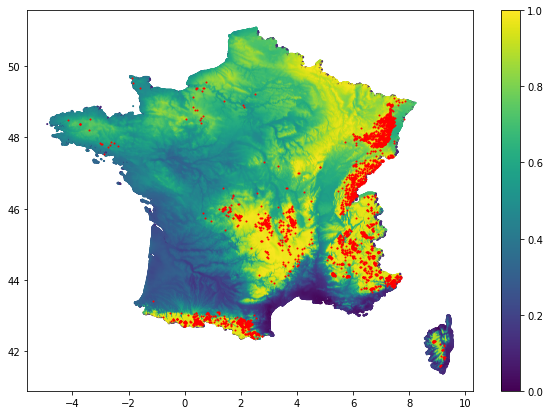

In [17]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.scatter(grid['lon'], grid['lat'], c=res, s=1)
plt.scatter(test_species.locations['lon'], test_species.locations['lat'], c='red', s=1)
plt.colorbar()
plt.show()

In [ ]:
x = [1, 3, 13, 16, 25, 28]
y = [37 + 28/60, 38.5, 36 + 52/60, 37 + 25/60, 36 + 22/60, 35 + 50/60]
plt.scatter(x, y)
plt.ylim((35, 40))
plt.show()